# Statistische analyse van Utrecht

## Inleiding
In Nederland worden voor elke gemeente cijfers bijgehouden van het aantal inwoners
en de mutaties op deze aantallen.  
Voor deze opdracht moeten voor tenminste 2 variabelen in de data de grafieken geplot worden.


## Aanpak
### Gemiddelde
Het gemiddelde wordt berekend door de som te nemen van alle getallen in een lijst
en door de som door de hoeveelheid getallen te delen.

### Mediaan
De mediaan is het middelste nummer in een gesorteerde rij van getallen.  
Deze wordt berekend door de oorspronkelijke rij te sorteren.
Wanneer er te maken is met een even rij getallen wordt de mediaan het gemiddelde
van de twee middelste getallen.
Bij een oneven rij is de mediaan het middelste getal.

### Modus
De modus is het getal dat het meeste voorkomt in een set van getallen.  
Deze wordt berekend door voor elk getal te berekenen hoe vaak deze voor komt in de set.
Het meestvoorkomende getal is hieruit dan de modus.

### Standaard deviatie
De standaarddeviatie is een spreidingsmaat die aangeeft hoe groot de verschillen zijn tussen de
verschillende waarnemingen.  
De formule voor het berekenen van de standaard deviatie ziet er als volgt uit:  
$\alpha_n = \sqrt{\frac{\sum_{i=0}^n (x_i - \mu)^2}{n}}$  
De standaarddeviatie wordt als volgt berekend:
- Bereken het gemiddelde
- Neem van elk getal de afstand tot het gemiddelde
- Neem het kwadraat van die afstanden
- Bereken het gemiddelde van die kwadraten
- Neem de wortel van de uitkomst  

### Trendlijn
Trendlijnen worden vaak gebruikt om te bepalen of er een lineair verband zit tussen twee variabelen in een x, y grafiek.  
De trendlijn wordt geschreven in een $y = \alpha x + \beta$ vorm.
Met de trendlijn kan worden gekeken hoe een variabele zich gedraagt wanneer de ander aangepast wordt.  
Allereerst wordt de helling berekend uit de dataset.
Dit wordt gedaan met behulp van de volgende formule:  
$\alpha = \frac{n\sum (xy) - \sum x \sum y}{n\sum x^2 - (\sum x)^2}$  
In deze formule staat $x$ voor de data van de x-as, $y$ voor de data uit de y-as en n voor de hoeveelheid datapunten.  
Om het raakpunt met de y-as te berekenen wordt er gebruik gemaakt van de volgende formule:  
$\beta = \frac{\sum y - \alpha \sum x}{n}$  
Wederom is hierin de $y$ de dataset van de y-as, $x$ de dataset van de x-as en $n$ de hoeveelheid datapunten.
Verder zal de eerder berekende helling ook meegenomen worden in deze berekening als $\alpha$.  
UitNa deze berekeningen zal er uiteindelijk een formule uitkomen in de vorm van:  
$y = \alpha x + \beta$  
Deze formule zal als trendlijn fungeren.
## Uitwerking
Voor alle eerder genoemde statistieken zullen functies gebouwd moeten worden.
Verder zal de data uit het csv bestand geprocessed worden.


In [82]:
import csv
import matplotlib.pyplot as plt
from matplotlib import style

data_dict = {}
columns = {}


def is_number(s):
    """Check if value is of type int"""
    try:
        int(s)
        return True
    except ValueError:
        return False


def data_to_dict(file):
    """Processing the data from the file"""
    
    with open(file) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=';')
        
        row_count = 0
        for row in csv_reader:
            if row_count == 0:
                for element in range(0, len(row)):
                    columns[row[element]] = element
                    data_dict[element] = []
                row_count += 1
            
            else:
                if 'JJ00' in str(row):
                    continue
                else:
                    for element in range(0, len(row)):
                        if is_number(row[element]):
                            # the element is an integer
                            data_dict[element].append(int(row[element]))
                        else:
                            # the element is not an integer
                            data_dict[element].append(row[element])

def mean(data_list):
    """Returns the mean value of the list"""
    return sum(data_list) / len(data_list)


def median(data_list):
    """Returns the median of the list"""
    sorted_list = sorted(data_list)
    if len(data_list) % 2 == 0:
        left_middle = sorted_list[len(sorted_list) // 2 - 1]
        right_middle = sorted_list[len(sorted_list) // 2]
        return (left_middle + right_middle) / 2
    else:
        return data_list[len(data_list) // 2]


def mode(data_list):
    """Returns the number that appears the most in the list"""
    number_dict = {}
    # 
    appearance_count = 0
    modus_key = 0
    number_dict[modus_key] = appearance_count
    
    # iterate over every element in the list
    for element in data_list:
        if element in number_dict:
            # the element key already exist
            number_dict[element] += 1
        else:
            # the element key doesn't already exist
            number_dict[element] = 1

        if number_dict[element] > appearance_count:
            modus_key = element
            appearance_count = number_dict[element]
    return modus_key


def std(data_list):
    """Returns the standard deviation of a list"""
    # get the mean value
    mean_value = mean(data_list)
    
    # calculate for every number the distance from the mean and square it
    diff_distance = []
    for element in data_list:
        diff_distance.append((element - mean_value) * (element - mean_value))
    
    # calculate the mean of all the squared values
    diff_mean = mean(diff_distance)
    
    # square root the mean and return it
    return diff_mean ** 0.5


def best_fit(y_list):
    """Calculate a trendline based on a list of y-values"""
    # 
    n = len(y_list)
    x_list = [x for x in range(1, len(y_list) + 1)]
    
    # initialize the variables
    a, b, c, d = 0, 0, 0, 0
    
    # calculate the values for b and d
    b = sum(x_list) * sum(y_list)
    d = sum(x_list) ** 2
    
    # calculate the values for a and c
    for num in range(0, len(x_list)):
        a += (x_list[num] * y_list[num])
        c += x_list[num] ** 2
    a = a * n
    c = c * n
    
    # calculate the slope
    slope = (a - b) / (c - d)
    
    # calculate the offset
    offset = (sum(y_list) - (slope * sum(x_list))) / n
    
    # calculating the trendline and return it
    trend_line = []
    for point in x_list:
        trend_line.append(point * slope + offset)
    return trend_line


## Plotten van de data

### Openen bestand en opslaan data


In [83]:
file_name = 'utrecht.csv'
data_to_dict(file_name)


## Geboortecijfers Utrecht 2017-2018


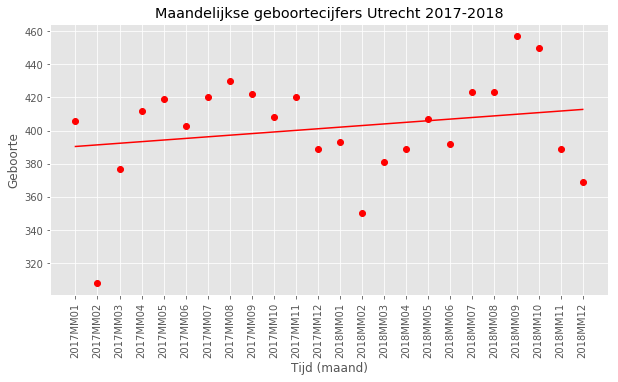

Mean: 401.5416666666667
Median: 406.5
Mode: 389
Standard Deviation: 30.881465809698142


In [85]:
# selecting the data
start_month, end_month = -26, -2
y_axis = data_dict[columns['LevendGeborenKinderen_2']][start_month:end_month]
x_axis = data_dict[columns['Perioden']][start_month:end_month]

# setting up the plot
plt.title("Maandelijkse geboortecijfers Utrecht 2017-2018")
plt.xlabel("Tijd (maand)")
plt.ylabel("Geboorte")
style.use('ggplot')
plt.rcParams['figure.figsize'] = [10,5]

# plotting the graph
plt.plot(x_axis, y_axis, 'ro')
plt.plot(best_fit(y_axis), 'r')
plt.xticks(rotation=90)
plt.show()

# printing info about the statistics
print("Mean: {0}\n"
      "Median: {1}\n"
      "Mode: {2}\n"
      "Standard Deviation: {3}".format(mean(y_axis), median(y_axis),
                                       mode(y_axis), std(y_axis)))


Uit de data en de grafiek kan gezegd worden dat er de laatste twee jaar gemiddeld 401 baby's per maand werden geboren.
Verder laat de trendlijn zien dat er een positieve trend is.
Ofwel dat de hoeveelheid baby's die geboren werden per maand toenam.


## Sterftecijfers Utrecht 2017-2018


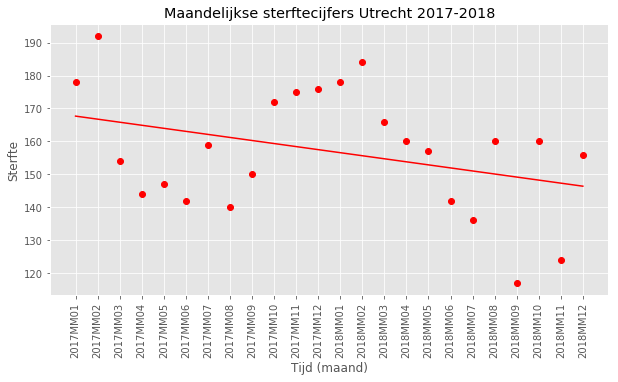

Mean: 157.04166666666666
Median: 158.0
Mode: 160
Standard Deviation: 18.320023577738343


In [81]:
# selecting the data
start_month, end_month = -26, -2
y_axis = data_dict[columns['Overledenen_3']][start_month:end_month]
x_axis = data_dict[columns['Perioden']][start_month:end_month]

# setting up the plot
plt.title("Maandelijkse sterftecijfers Utrecht 2017-2018")
plt.xlabel("Tijd (maand)")
plt.ylabel("Sterfte")
style.use('ggplot')
plt.rcParams['figure.figsize'] = [10,5]

# plotting the graph
plt.plot(x_axis, y_axis, 'ro')
plt.plot(best_fit(y_axis), 'r')
plt.xticks(rotation=90)
plt.show()

# printing info about the statistics
print("Mean: {0}\n"
      "Median: {1}\n"
      "Mode: {2}\n"
      "Standard Deviation: {3}".format(mean(y_axis), median(y_axis),
                                       mode(y_axis), std(y_axis)))


Uit de data en de grafiek kan gezegd worden dat er de laatste twee jaar gemiddeld 157 personen per maand overleden zijn.
Verder laat de trendlijn zien dat er een negatieve trend is.
Ofwel dat de hoeveelheid mensen die maandelijks overleed afnam.  
Wanneer de eerste grafiek en de tweede grafiek naast elkaar worden gelegd kan de conclusie worden getrokken
dat in de laatste twee jaar de bevolkingsgroei in Utrecht is toegenomen.  
Verder kan er gezegd worden, als deze trend aanhoudt, dat de gemiddelde leeftijd in Utrecht zal afnemen.
Dit komt omdat er maandelijks ruim 2 keer zoveel baby's bijkomen dan dat er mensen sterven.

